
Consider the singular value decomposition of a matrix $\, X \in \mathbb{R}^{n_{1} \times n_{2}} \,$  of rank r
$$ \mathit{X} = \mathit{U} \Sigma \mathit{V}\, , \quad \Sigma = diag(\{\sigma_{i}\}_{1\leq i \leq r})$$
Define the singular value thresholding operator $\mathcal{D}_{\tau}$:
$$ \mathcal{D}_{\tau}(X) = \mathit{U} \mathcal{D}_{\tau}(\Sigma) \mathit{V}\, , \quad \mathcal{D}_{\tau}(\Sigma)=diag(\{(\sigma_{i}-\tau)_{+}\}_{1\leq i \leq r})$$
And $\mathcal{D}_{\tau} \,$ is the proximity operator of $\, \tau \Vert X \Vert_{*}$, namely:
$$ \mathcal{D}_{\tau}(Y) = \arg\min_{X}\{\tau\Vert X \Vert_{*}+\frac{1}{2}\Vert X- Y \Vert_{F}^{2} \} $$

***
The original problem is:
$$ \min \, \Vert X \Vert_{*} \\
s.t. \quad X_{ij} = M_{ij} \quad (i,j)\in \omega$$
it is equivalent to the following problem when $\lambda$ is large :
$$ \min\, \lambda\Vert X \Vert_{*}+\frac{1}{2}\Vert \mathcal{P}_{\omega}(X)- \mathcal{P}_{\omega}(M) \Vert_{F}^{2} \\
\mathcal{P}_{\omega}(X) = 
\begin{cases}
X_{ij} & \text{if (i,j)$ \,\in \omega$} \\
   0  & \text{otherwise}
\end{cases}$$


using proximal gradient method:
$$ Let\quad f(X) = \frac{1}{2}\Vert \mathcal{P}_{\omega}(X)- \mathcal{P}_{\omega}(M) \Vert_{F}^{2}  \quad and \quad g(X) = \lambda\Vert X \Vert_{*} $$
Then the iteration scheme is :(simply choose the lipchitz coef to be 1)
$$
\begin{aligned}
X_{k+1} &= \arg\min_{X} \{f(X_{k})+ <X-X_{k}, \nabla f(X_{k})> + \frac{1}{2\delta_{k}}\Vert X-X_{k} \Vert_{F}^{2} +g(X) \}\\
        &= \arg\min_{X} \{g(X)+  \frac{1}{2\delta_{k}}\Vert X-(X_{k}-\delta_{k}\nabla f(X_{k})  \Vert_{F}^{2} \}\\
\end{aligned}
$$

It's easy to see $\nabla f(X_{k}) = \mathcal{P}_{\omega}(X_{k})- \mathcal{P}_{\omega}(M). \quad$
Let $Y_{k} = X_{k}- \delta_{k}\nabla f(X_k) = X_{k} - \delta_{k}(\mathcal{P}_{\omega}(X_{k})- \mathcal{P}_{\omega}(M)) .\,$ Then,$\, X_{k+1} = \mathcal{D}_{\lambda}(Y_k)  \, \, \text{by definition of} \, \mathcal{D}_{\lambda}.$  

So the iteration scheme is equivalent to :
$$
\begin{aligned}
X_{k+1} &=     \mathcal{D}_{\lambda \delta_{k}}(Y_{k}) \\
Y_{k+1} &= X_{k+1}+ \delta_{k}\mathcal{P}_{\omega}(M-X_{k+1})
\end{aligned}
$$
And set the stop criteria to be:
$$
\Vert \mathcal{P}_{\omega}(M-X_{k}) \Vert_{F} \leq 10^{-4} \quad or \quad \, k \, = max \, iteration \, numbers
$$


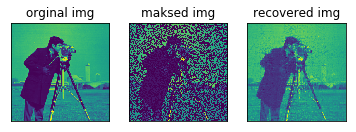

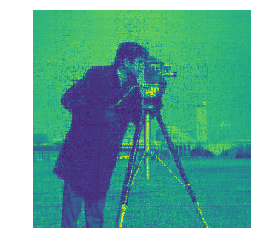

In [21]:
import cv2 as cv
import numpy as np  
import matplotlib.pyplot as plt
from scipy.sparse import random
from scipy.stats import bernoulli
from numpy.linalg import svd,norm
#####
#Soft thresholding operator
def sft(X,tao):
    U,d,V = svd(X)
    d = np.maximum(d-tao,0)
    D = np.diag(d)
    return np.matmul(np.matmul(U,D),V)
#####

#####
#Read img 
img = cv.imread("cameraman.tif",2)
#img = (img-np.mean(img))/np.std(img)
rv = bernoulli(0.5).rvs
mask = random(256,256,0.5).todense()
mask[mask>0] =1
masked_img = np.multiply(mask,img)
fig,aixes = plt.subplots(1,3)
aixes[0].imshow(img)
aixes[0].set_title('orginal img')
aixes[0].set_xticks([])
aixes[0].set_yticks([])
aixes[1].imshow(masked_img)
aixes[1].set_title('maksed img')
aixes[1].set_xticks([])
aixes[1].set_yticks([])
#####

#####
#Initialize and set hyperparameters
tao = 40*256
delta = 0.2
pro_M = norm(masked_img,'fro')
k_0 = np.round(tao/(delta*pro_M))+1
Y_k = delta*k_0*masked_img
X_k = sft(Y_k,tao)
k = 0
#####

######
#Iteration  Scheme
while norm(np.multiply((X_k-img),mask),'fro') >1e-4 and k <=400:
#while norm(np.multiply(masked_img-X_k,mask),'fro') >1e-4 :
    X_k = sft(Y_k,tao)
    #X_k = np.clip(X_k,7,253)
    Y_k = Y_k + delta*np.multiply((img-X_k),mask)
    k += 1
#X_k = np.clip(0,255,X_k)
#X_k = np.clip(X_k,0,255)
aixes[2].imshow(X_k)
aixes[2].set_title('recovered img')
aixes[2].set_xticks([])
aixes[2].set_yticks([])
plt.show()
plt.figure()
plt.imshow(X_k)
plt.axis('off')

plt.show()
######